**Etapa 1: Conexão e Importação de Dados**

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from IPython.display import display

file_path = r"G:\Meu Drive\CEBRAP\SEPEP\Cluster final - v2.xlsx"

# Carregar dados diretamente
df = pd.read_excel(file_path)

print("Dados carregados com sucesso!")
print(df.head())

Dados carregados com sucesso!
   ID_OD           Distrito  \
0      1          agua rasa   
1      2  alto de pinheiros   
2      3         anhanguera   
3      4         aricanduva   
4      5        artur alvim   

   % da população distrital a até 300 metros de uma ciclovia pretos e pardos - Censo 2022| GeoSampa 2025  \
0                                             26.786                                                       
1                                             42.957                                                       
2                                              0.000                                                       
3                                             35.069                                                       
4                                             45.344                                                       

   % da população distrital a até 300 metros de uma ciclovia - Censo 2022| GeoSampa 2025  \
0                                         

**Etapa 2: Pré-processamento dos Dados**

In [2]:
print("\n\nEtapa 2: Pré-processamento dos Dados")

# Selecionar colunas numéricas exceto as colunas especificadas
exclude_cols = ["Ordem_original", "ID_OD", "Distrito"]
num_cols = df.select_dtypes(include=[np.number]).columns.difference(exclude_cols)

def preprocess_data(df, num_cols):
    # Imputação de valores faltantes com a mediana
    imputer = SimpleImputer(strategy='median')
    df[num_cols] = imputer.fit_transform(df[num_cols])

    # Padronização dos dados
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df[num_cols])

    return data_scaled

# Aplicar pré-processamento
data_scaled = preprocess_data(df, num_cols)
print("Pré-processamento concluído. Dados padronizados e valores faltantes tratados.")



Etapa 2: Pré-processamento dos Dados
Pré-processamento concluído. Dados padronizados e valores faltantes tratados.


**Etapa 3: Determinação do Número Ótimo de Clusters**



Etapa 3: Determinação do Número Ótimo de Clusters


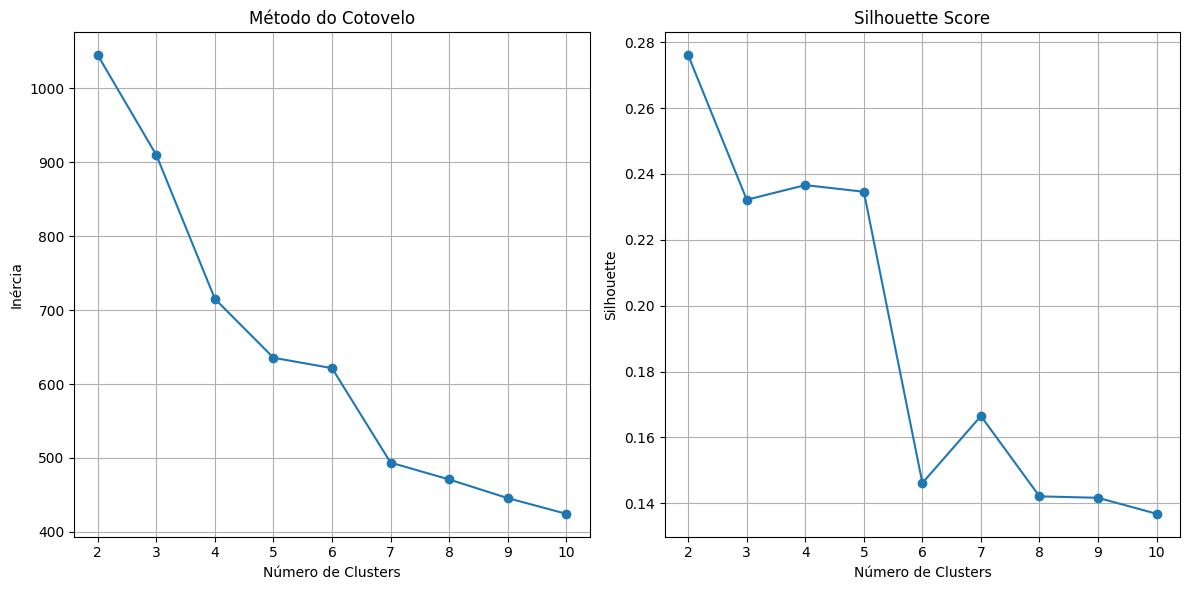

Análise do número ótimo de clusters concluída.
Inércia para cada k: [1044.7162790126913, 909.6382496419103, 715.1187064667099, 635.5672230866204, 621.4806146103105, 493.76710160527745, 470.9371946790399, 445.73009193475593, 424.4871400188598]
Silhouette scores para cada k: [np.float64(0.2760514912249699), np.float64(0.23218280319896156), np.float64(0.236625791215913), np.float64(0.23461075926781313), np.float64(0.14617014169762713), np.float64(0.16651264638948057), np.float64(0.14212174224422344), np.float64(0.14168171145169253), np.float64(0.136830347962521)]


In [3]:
print("\n\nEtapa 3: Determinação do Número Ótimo de Clusters")

def find_optimal_clusters(data, k_range):
    inertia = []
    silhouette_scores = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

        # Silhouette score não funciona para k=1
        if k > 1:
            silhouette_scores.append(silhouette_score(data, kmeans.labels_))
        else:
            silhouette_scores.append(0)

    return inertia, silhouette_scores

# Testar de 2 a 10 clusters
k_range = range(2, 11)
inertia, silhouette_scores = find_optimal_clusters(data_scaled, k_range)

# Visualizar resultados
plt.figure(figsize=(12, 6))

# Método do Cotovelo
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.grid(True)

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Análise do número ótimo de clusters concluída.")
print(f"Inércia para cada k: {inertia}")
print(f"Silhouette scores para cada k: {silhouette_scores}")

**Etapa 4: Aplicar o Algoritmo de Clustering**

In [4]:
print("\n\nEtapa 4: Aplicar o Algoritmo de Clustering")

# Definir o número de clusters com base na análise visual
# Pode ser alterado conforme análise dos gráficos anteriores
n_clusters = 3 # Ajuste este valor baseado no resultado da etapa 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

print(f"\nDistribuição dos {n_clusters} clusters:")
print(df['Cluster'].value_counts())



Etapa 4: Aplicar o Algoritmo de Clustering

Distribuição dos 3 clusters:
Cluster
2    41
0    39
1    16
Name: count, dtype: int64


**Etapa 5: Visualização dos Resultados**



Etapa 5: Visualização dos Resultados de Clustering


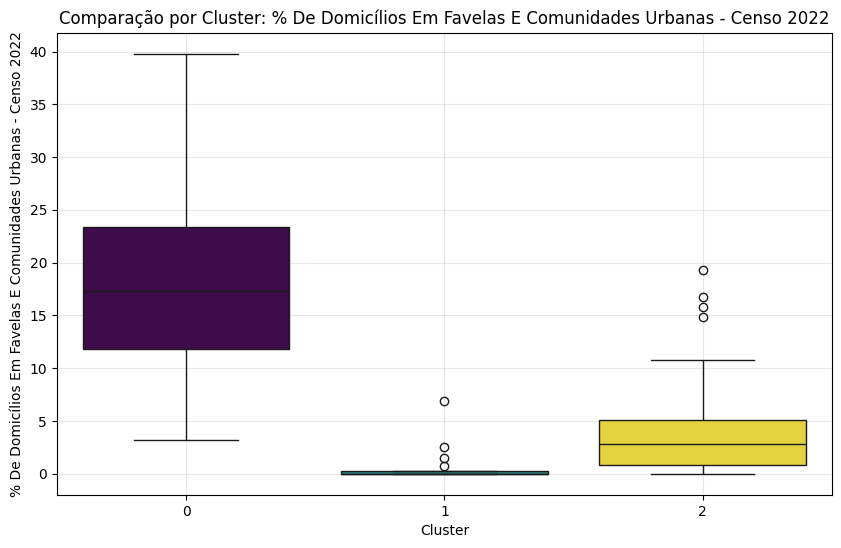

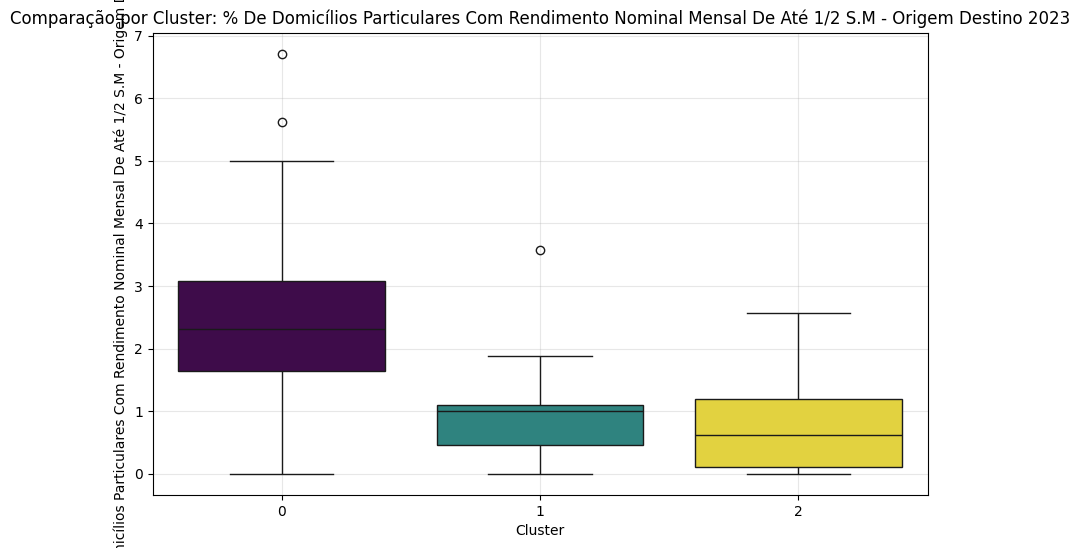

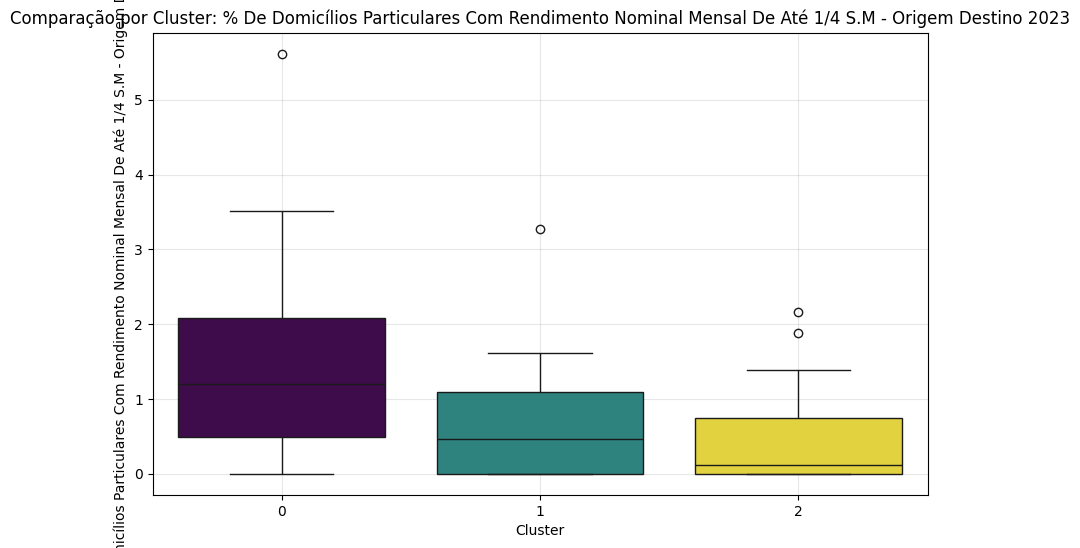

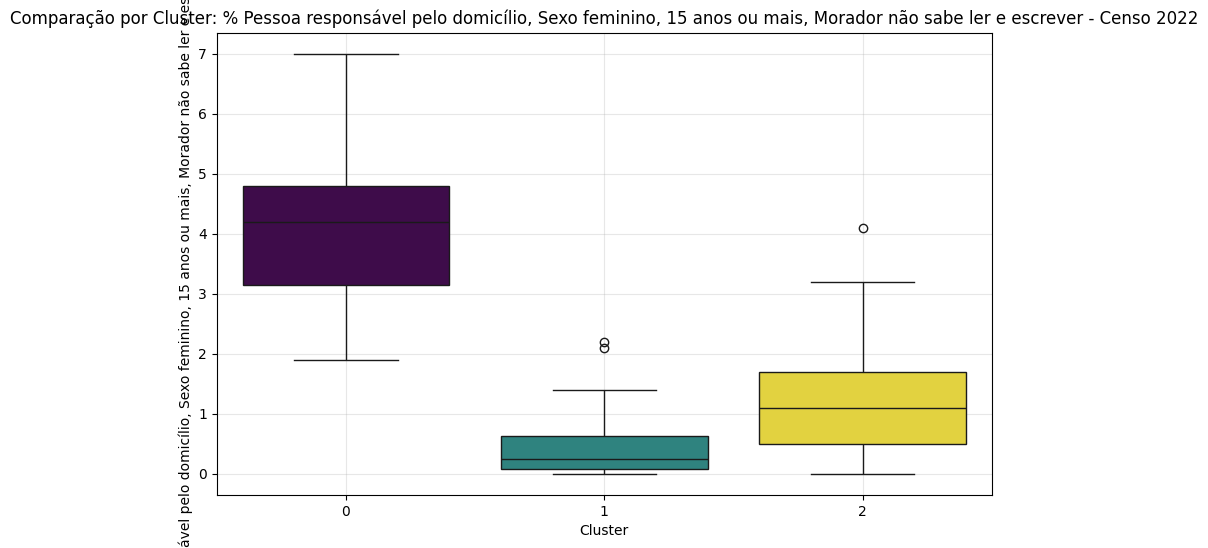

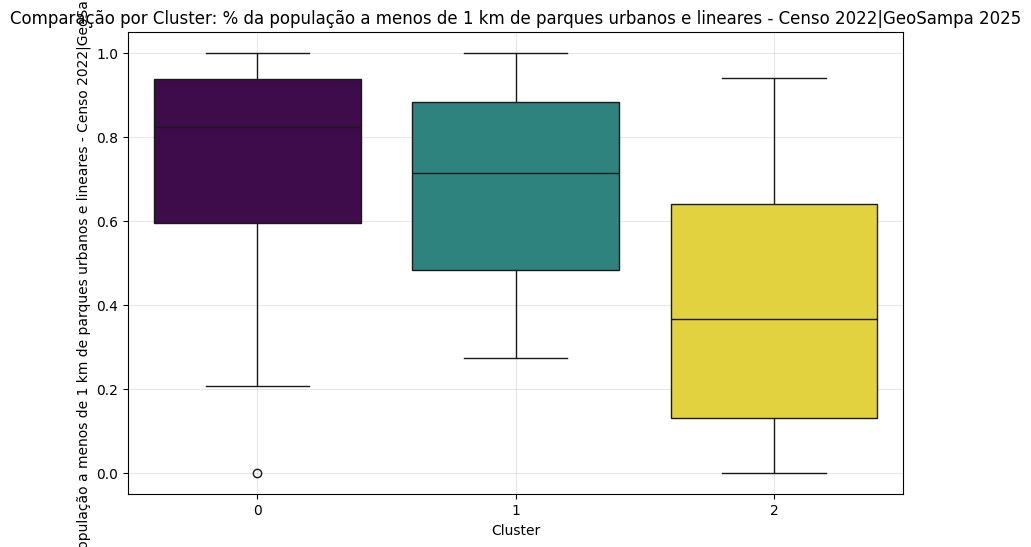

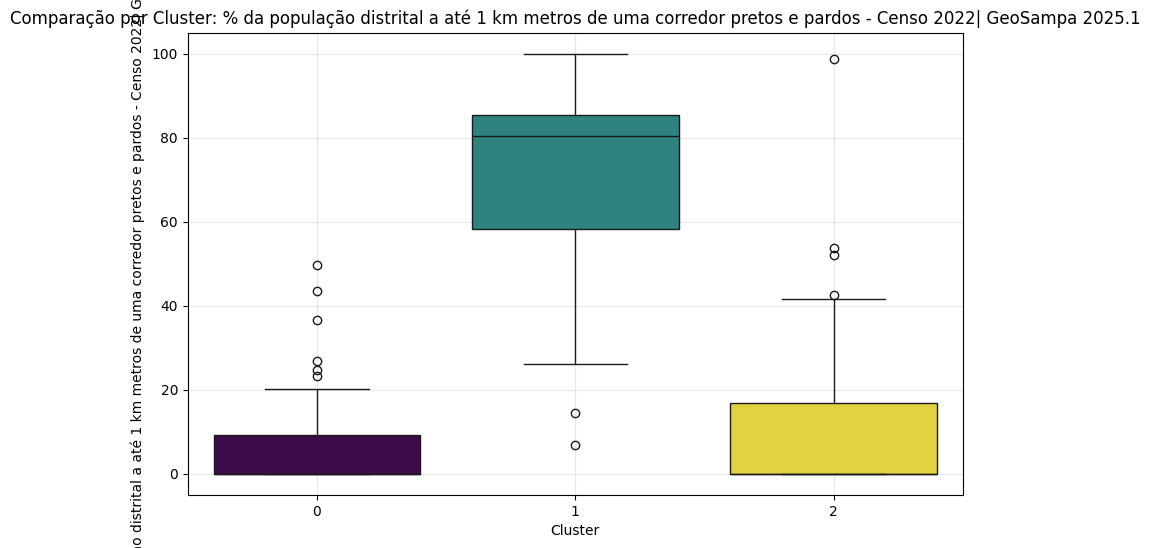

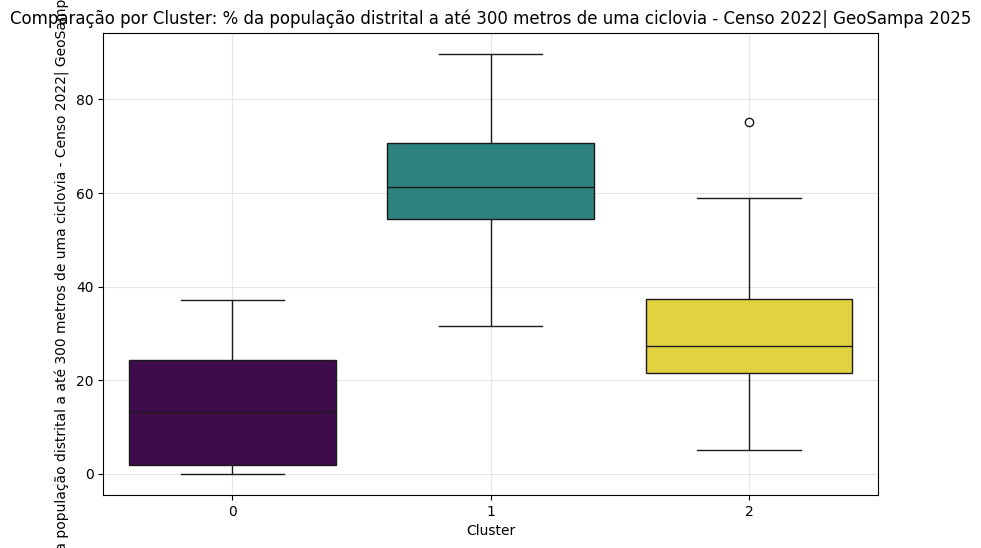

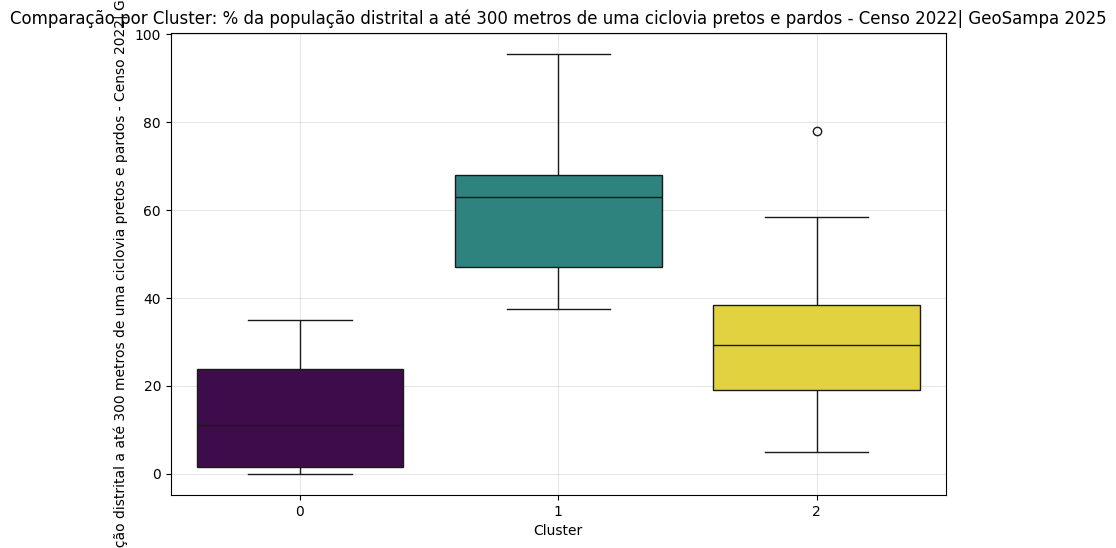

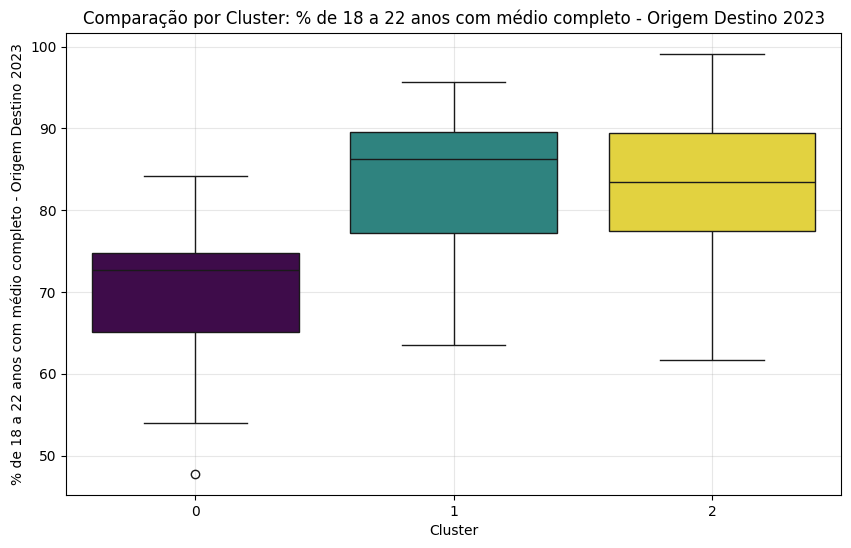

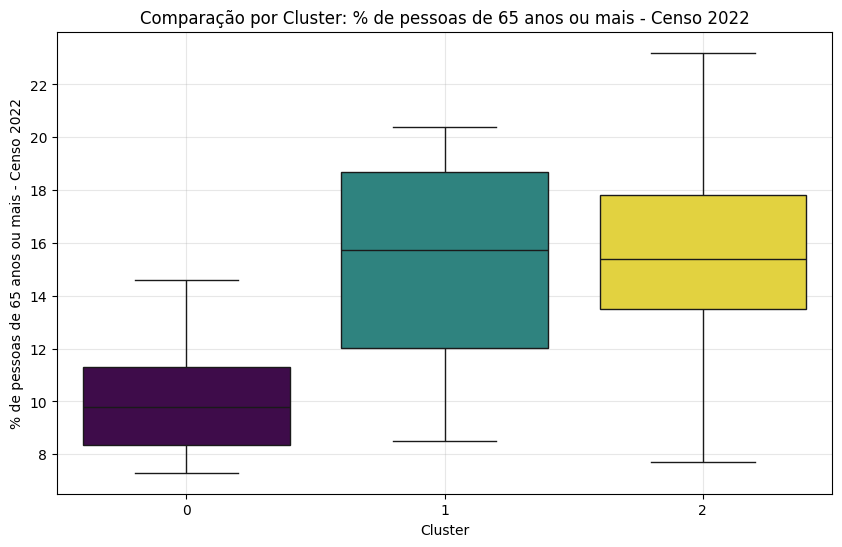

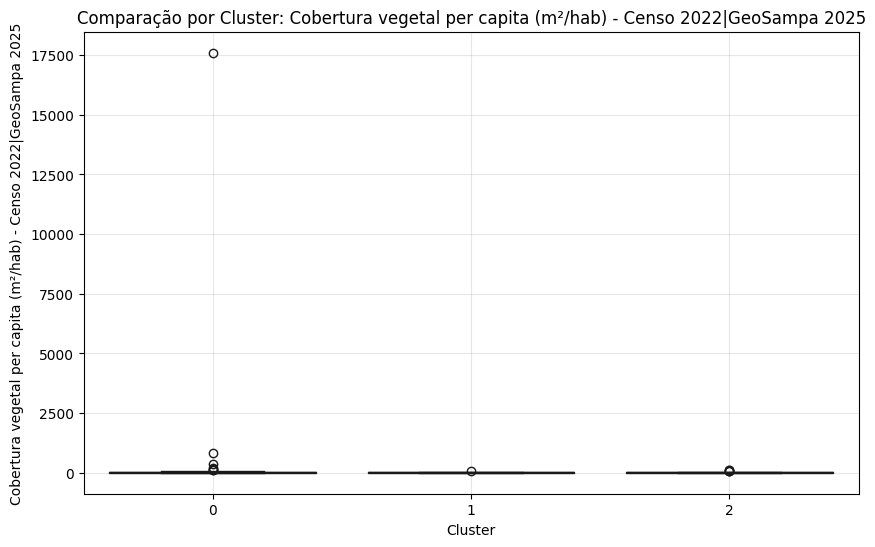

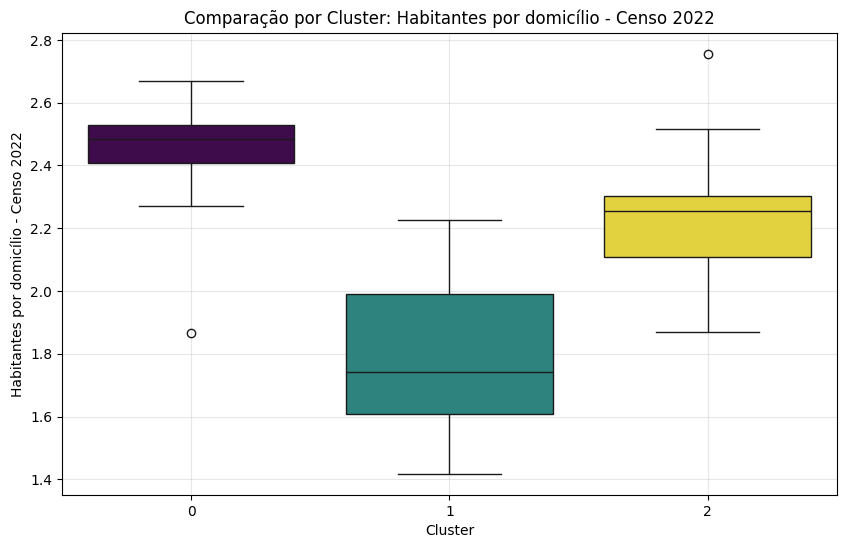

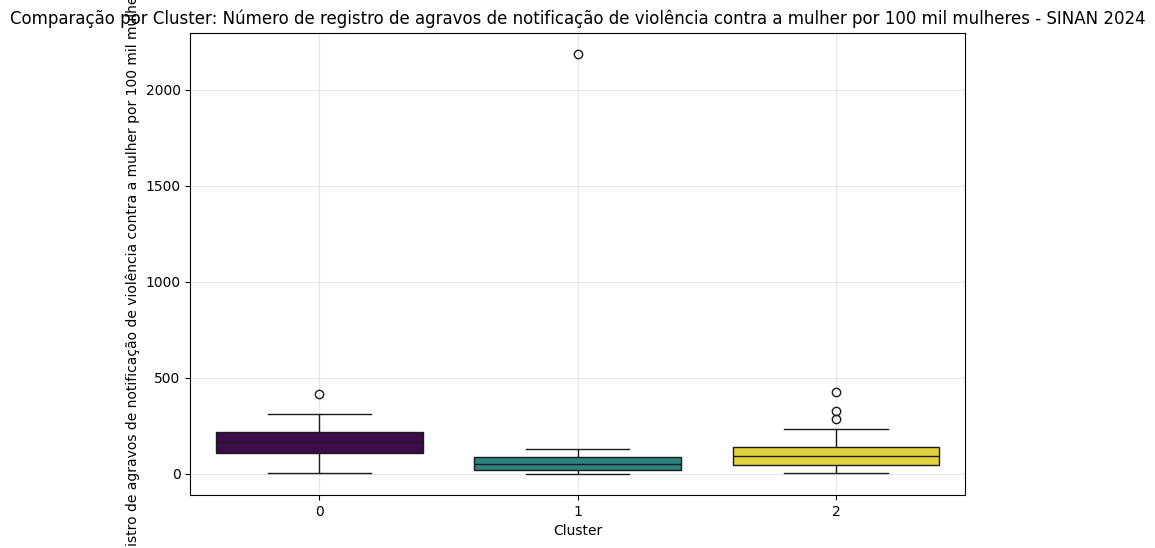

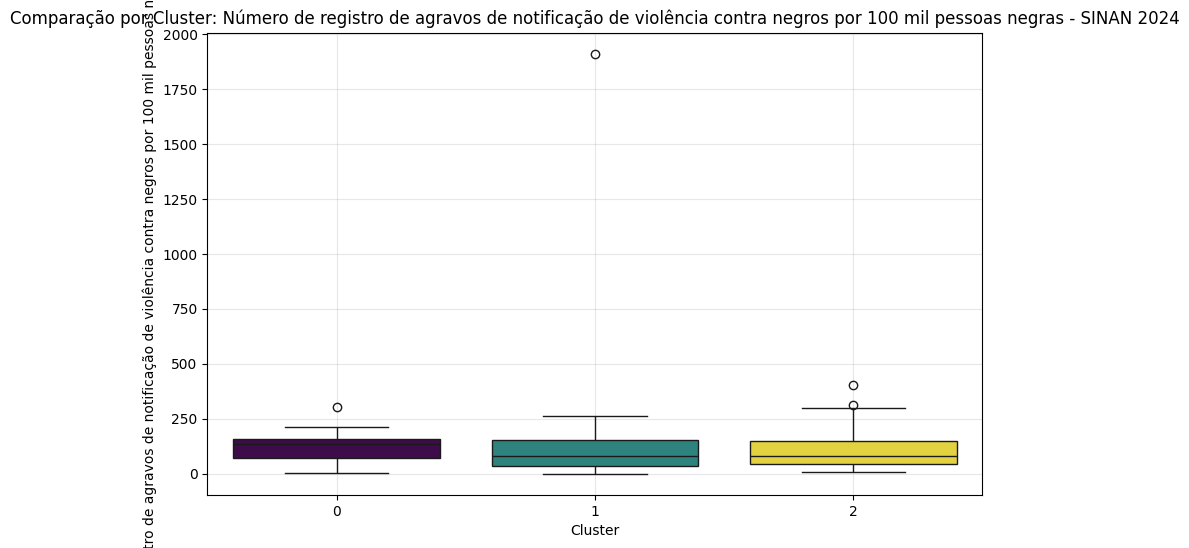

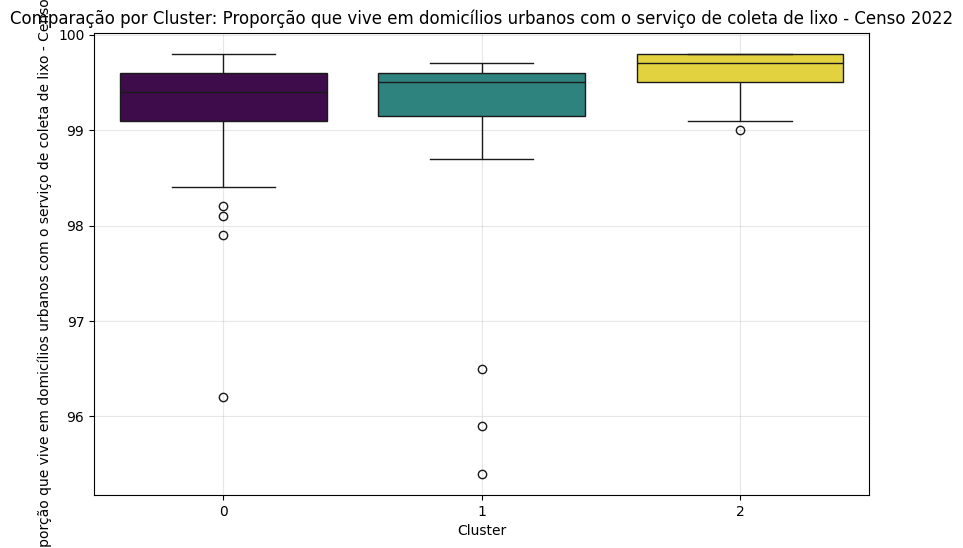

In [5]:
print("\n\nEtapa 5: Visualização dos Resultados de Clustering")

def visualize_clusters(df, num_cols):
    # Visualizar as variáveis
    for col in num_cols[:27]:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Cluster', y=col, data=df, palette='viridis', hue='Cluster', legend=False)
        plt.title(f'Comparação por Cluster: {col}')
        plt.xlabel('Cluster')
        plt.ylabel(col)
        plt.grid(True, alpha=0.3)
        plt.show()

visualize_clusters(df, num_cols)

**Etapa 6: Visualização com PCA**



Etapa 6: Análise de Componentes Principais (PCA)
Total de colunas no banco: 18
Nomes das colunas: ['ID_OD', 'Distrito', '% da população distrital a até 300 metros de uma ciclovia pretos e pardos - Censo 2022| GeoSampa 2025', '% da população distrital a até 300 metros de uma ciclovia - Censo 2022| GeoSampa 2025', '% da população distrital a até 1 km metros de uma corredor pretos e pardos - Censo 2022| GeoSampa 2025.1', '% De Domicílios Particulares Com Rendimento Nominal Mensal De Até 1/2 S.M - Origem Destino 2023', '% De Domicílios Particulares Com Rendimento Nominal Mensal De Até 1/4 S.M - Origem Destino 2023', '% De Domicílios Em Favelas E Comunidades Urbanas - Censo 2022', '% da população a menos de 1 km de parques urbanos e lineares - Censo 2022|GeoSampa 2025', 'Proporção que vive em domicílios urbanos com o serviço de coleta de lixo - Censo 2022', 'Habitantes por domicílio - Censo 2022', 'Cobertura vegetal per capita (m²/hab) - Censo 2022|GeoSampa 2025', '% de 18 a 22 anos com m

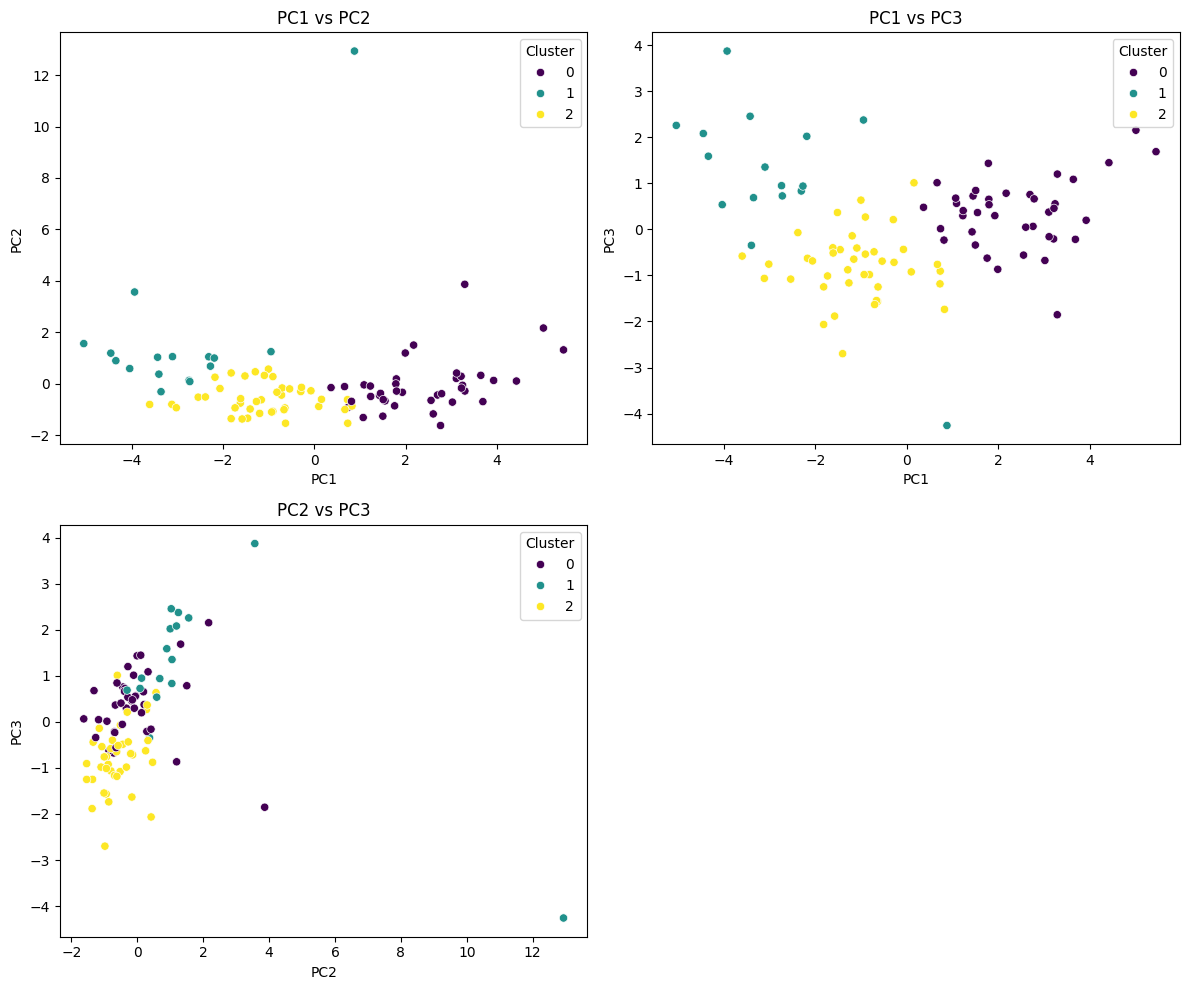

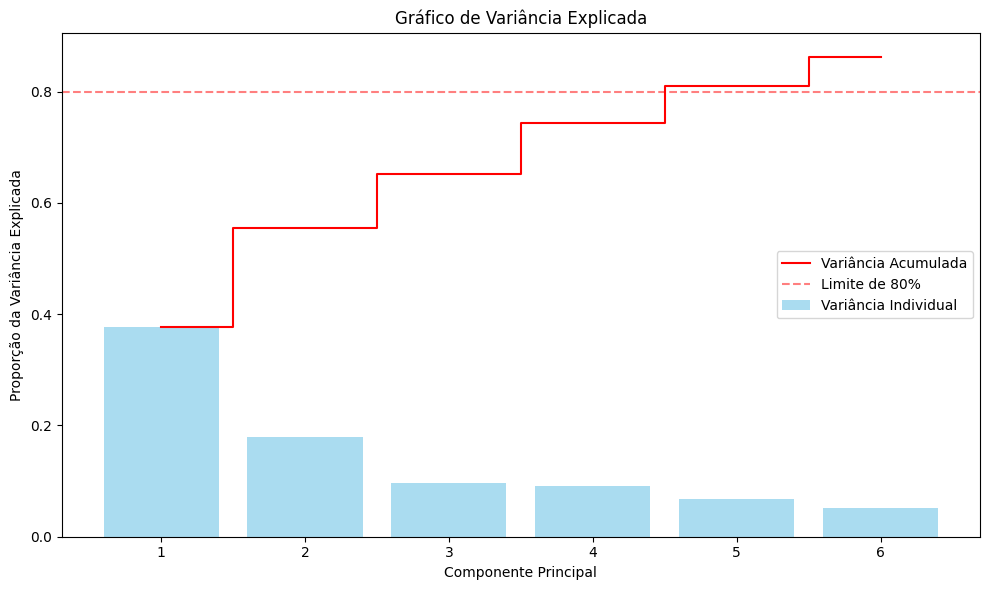

In [6]:
# Etapa 6: Análise de Componentes Principais (PCA)
print("\n\nEtapa 6: Análise de Componentes Principais (PCA)")

# Verificar estrutura do dataframe
print(f"Total de colunas no banco: {len(df.columns)}")
print(f"Nomes das colunas: {df.columns.tolist()}")

# Definir explicitamente as colunas para análise (excluindo colunas indesejadas)
exclude_cols = ['Distrito', 'Cluster', 'Ordem_original', 'ID_OD']
analysis_columns = [col for col in df.columns if col not in exclude_cols]
feature_names = analysis_columns.copy()
print(f"\nTotal de colunas para análise PCA: {len(analysis_columns)}")
print(f"Colunas para análise PCA: {analysis_columns}")

# Verificar tipos de dados de cada coluna
dtypes = df[analysis_columns].dtypes
print("\nTipos de dados das colunas de análise:")
for col, dtype in dtypes.items():
    print(f"{col}: {dtype}")

# Preparar os dados para PCA - criando uma cópia para trabalhar
data_for_pca = df[analysis_columns].copy()

# Forçar conversão para números em colunas não numéricas
for col in data_for_pca.columns:
    if not pd.api.types.is_numeric_dtype(data_for_pca[col]):
        print(f"Convertendo coluna {col} para numérica...")
        # Substituir vírgulas por pontos, caso haja números em formato brasileiro
        if data_for_pca[col].dtype == 'object':
            data_for_pca[col] = data_for_pca[col].str.replace(',', '.', regex=False)
        data_for_pca[col] = pd.to_numeric(data_for_pca[col], errors='coerce')

# Verificar valores ausentes após conversão
missing_values = data_for_pca.isnull().sum()
print("\nValores ausentes por coluna após conversão:")
for col, missing in missing_values.items():
    if missing > 0:
        print(f"{col}: {missing} valores ausentes")

# Tratamento mais robusto de valores ausentes
print("\nRealizando tratamento robusto de valores ausentes...")

# 1. Primeiro, calcular as médias desconsiderando NaNs
column_means = data_for_pca.mean(skipna=True)

# 2. Verificar se há colunas com 100% de NaN
all_nan_columns = []
for col in data_for_pca.columns:
    if data_for_pca[col].isna().sum() == len(data_for_pca):
        print(f"ATENÇÃO: A coluna '{col}' tem 100% de valores ausentes.")
        all_nan_columns.append(col)
        # Definimos um valor arbitrário de 0 para essas colunas
        column_means[col] = 0

# 3. Preencher valores ausentes com a média
data_for_pca = data_for_pca.fillna(column_means)

# 4. Verificar se ainda há valores ausentes
remaining_nans = data_for_pca.isnull().sum().sum()
if remaining_nans > 0:
    print(f"ALERTA: Ainda restam {remaining_nans} valores NaN. Vamos tentar um método alternativo.")
    # Substituir NaNs restantes por 0 como último recurso
    data_for_pca = data_for_pca.fillna(0)

# 5. Verificação final de valores ausentes
final_check = data_for_pca.isnull().sum().sum()
print(f"Verificação final: {final_check} valores ausentes restantes.")

# Garantir que os dados estão em formato float
data_for_pca = data_for_pca.astype(float)

# Listagem final das variáveis incluídas
feature_names = list(num_cols)
print(f"\nVariáveis incluídas na análise PCA ({len(feature_names)}):")
for i, feature in enumerate(feature_names):
    print(f"{i+1}. {feature}")

# Escalar os dados para o PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Verificar se há NaN nos dados escalados
if np.isnan(data_scaled).any():
    print("ALERTA: Ainda há NaNs nos dados escalados. Substituindo por zeros.")
    data_scaled = np.nan_to_num(data_scaled)

# Verificação final antes do PCA
print(f"Shape dos dados para PCA: {data_scaled.shape}")
print(f"Há NaNs nos dados? {np.isnan(data_scaled).any()}")
print(f"Há infinitos nos dados? {np.isinf(data_scaled).any()}")

# Aplicar PCA aos dados
n_components = 6  # PC1-PC5
pca = PCA(n_components=n_components)
try:
    principal_components = pca.fit_transform(data_scaled)
    print("PCA aplicado com sucesso!")
except Exception as e:
    print(f"Erro ao aplicar PCA: {e}")
    # Tentar uma versão mais robusta se falhar
    print("Tentando método alternativo...")
    # Substituir NaNs e infinitos por zeros
    data_scaled_clean = np.nan_to_num(data_scaled)
    principal_components = pca.fit_transform(data_scaled_clean)
    print("PCA alternativo aplicado com sucesso!")

# Criar DataFrame com os componentes principais
pca_df = pd.DataFrame(
    data=principal_components,
    columns=[f'PC{i+1}' for i in range(n_components)]
)

# Adicionar a coluna de clusters ao DataFrame PCA
pca_df['Cluster'] = df['Cluster']

# 1. Variância explicada por cada componente
variance_explained = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_explained)

print("\n1. Variância explicada por componente:")
for i, var in enumerate(variance_explained):
    print(f"PC{i+1}: {var:.4f} ({cumulative_variance[i]:.4f} acumulado)")

# 2. Principais variáveis que contribuem para cada componente
loadings = pca.components_

print("\n2. Contribuição das variáveis para cada componente:")
for i, component in enumerate(loadings):
    # Ordenar os loadings pelo valor absoluto
    sorted_indices = np.argsort(np.abs(component))[::-1]
    top_indices = sorted_indices[:5]  # Top 5 variáveis

    print(f"\nPC{i+1} - Top 5 variáveis:")
    for idx in top_indices:
        print(f"  {feature_names[idx]}: {component[idx]:.4f}")

# 3. Visualização dos componentes principais
plt.figure(figsize=(12, 10))

# Scatter plot PC1 vs PC2 colorido por cluster
plt.subplot(2, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PC1 vs PC2')

# Scatter plot PC1 vs PC3
plt.subplot(2, 2, 2)
sns.scatterplot(x='PC1', y='PC3', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PC1 vs PC3')

# Scatter plot PC2 vs PC3
plt.subplot(2, 2, 3)
sns.scatterplot(x='PC2', y='PC3', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PC2 vs PC3')

plt.tight_layout()
plt.show()

# 4. Gráfico de variância explicada (scree plot)
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), variance_explained, alpha=0.7, color='skyblue')
plt.step(range(1, n_components + 1), cumulative_variance, where='mid', color='red')
plt.axhline(y=0.8, color='r', linestyle='--', alpha=0.5)
plt.xlabel('Componente Principal')
plt.ylabel('Proporção da Variância Explicada')
plt.title('Gráfico de Variância Explicada')
plt.legend(['Variância Acumulada', 'Limite de 80%', 'Variância Individual'])
plt.tight_layout()
plt.show()

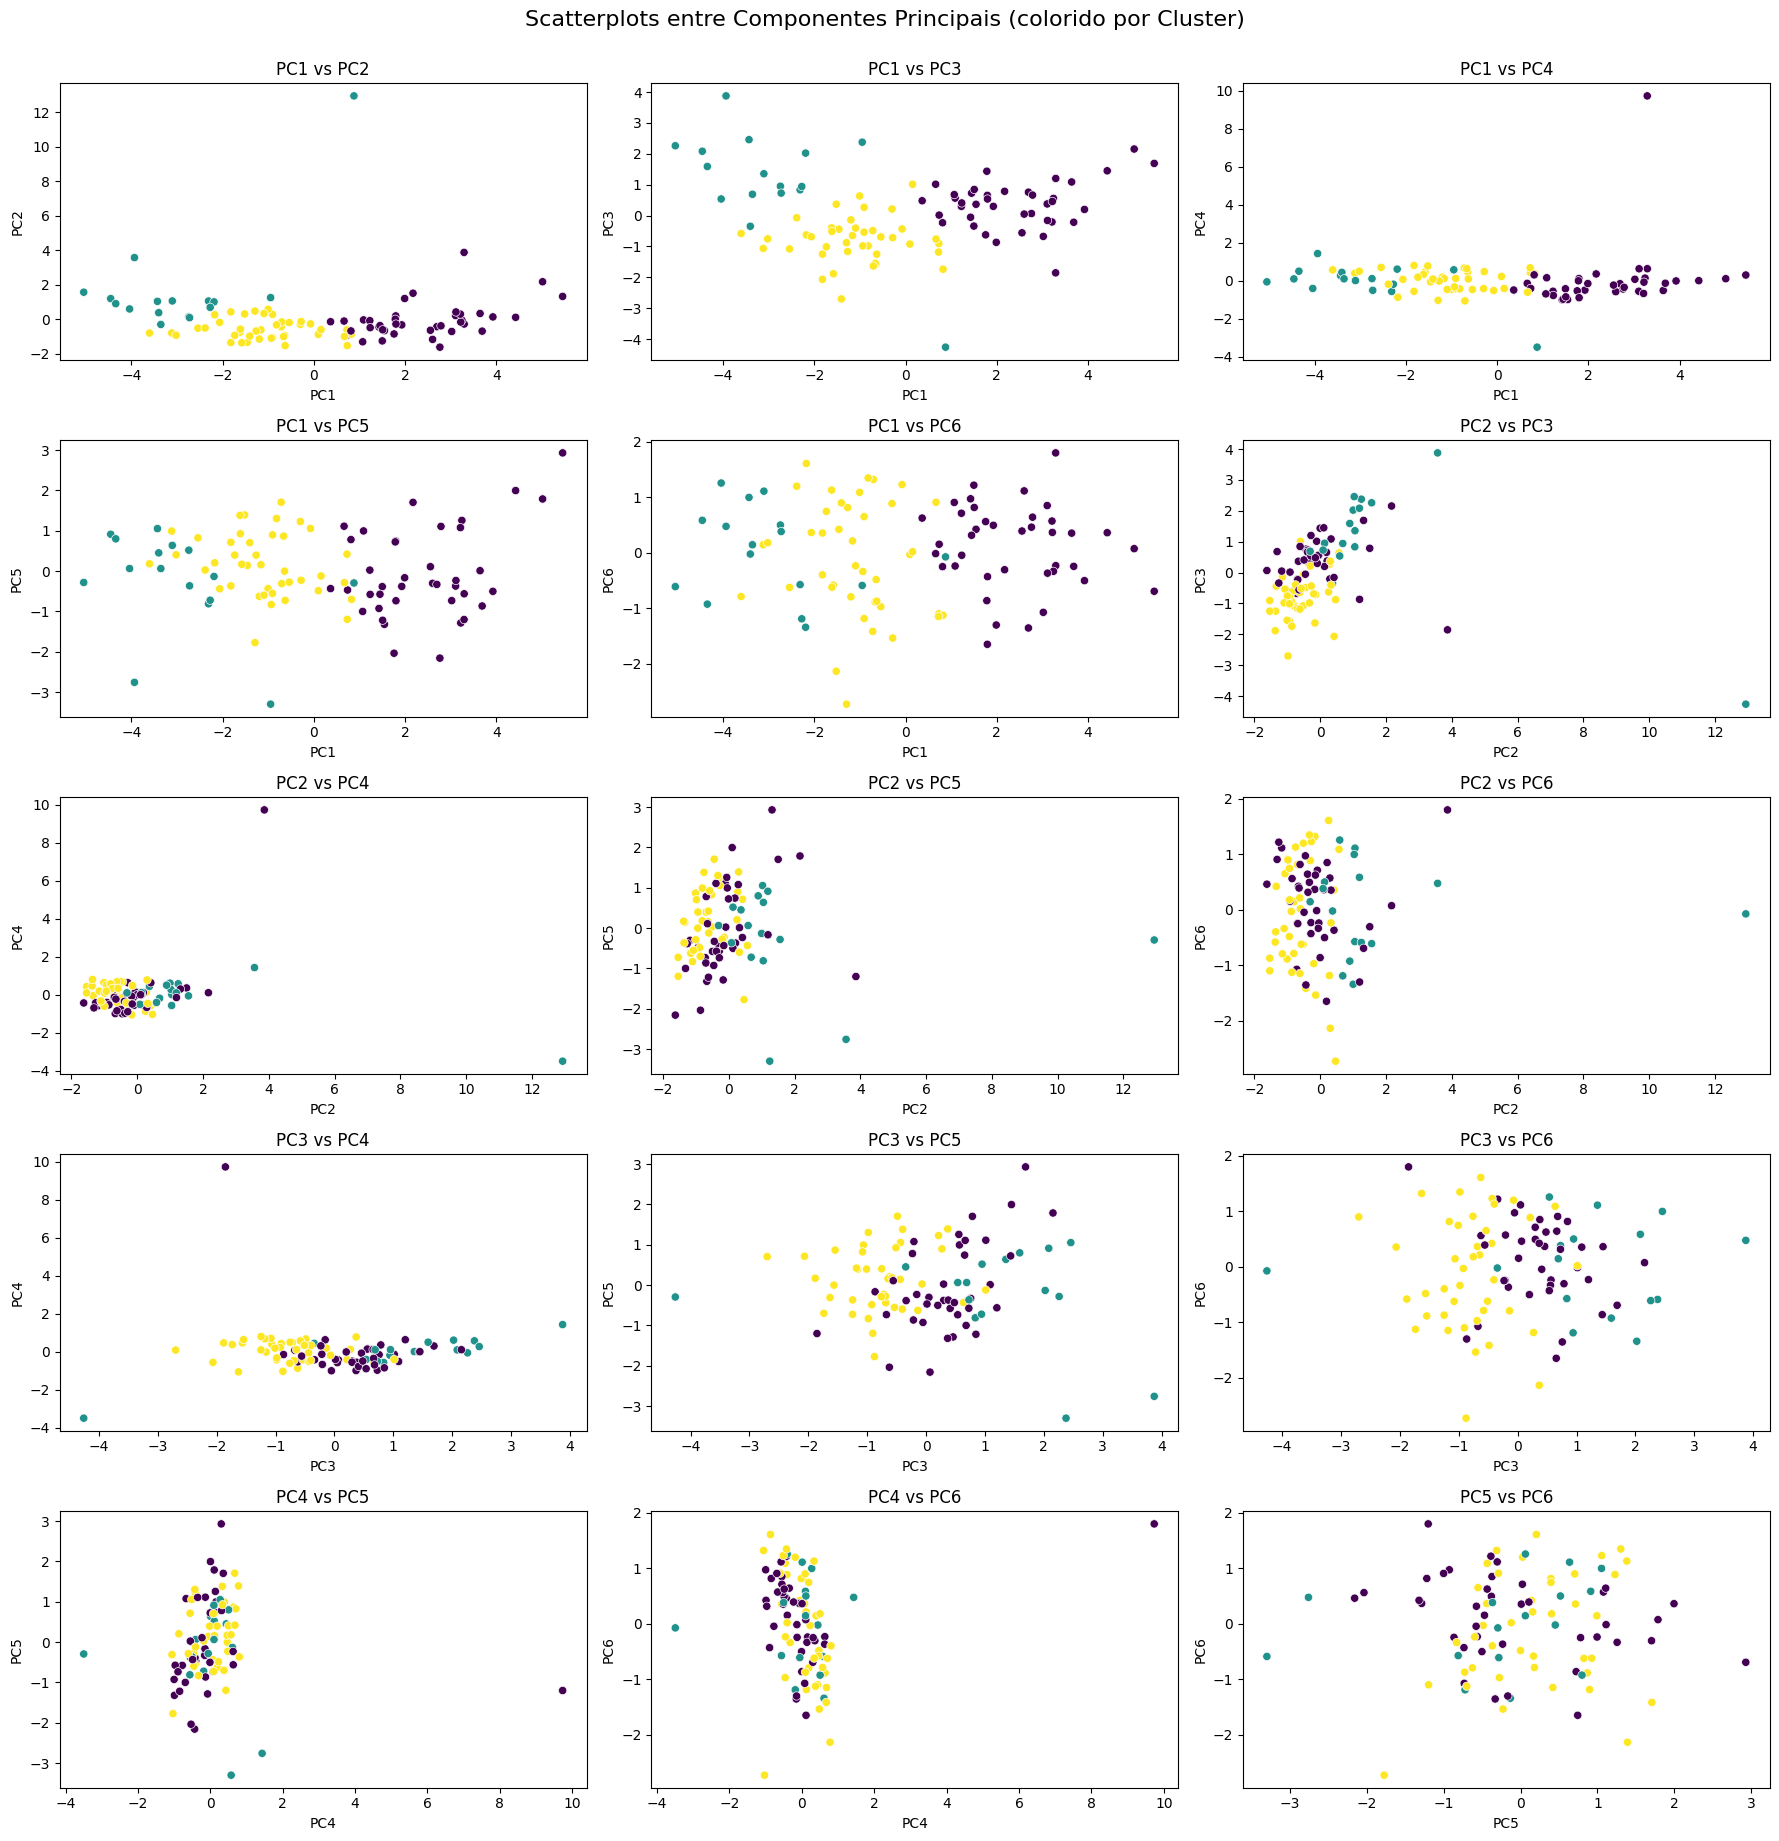

In [7]:
# 3. Visualização dos componentes principais - todos os pares de PCs
import itertools

plt.figure(figsize=(18, 18))

# Criar todas as combinações únicas de 2 componentes dentre os 6
combinations = list(itertools.combinations(range(1, n_components + 1), 2))

# Gerar um scatterplot para cada combinação
for i, (pc_x, pc_y) in enumerate(combinations):
    plt.subplot(5, 3, i + 1)  # Layout de 5 linhas x 3 colunas (15 gráficos no total para 6 PCs)
    sns.scatterplot(
        x=f'PC{pc_x}',
        y=f'PC{pc_y}',
        hue='Cluster',
        data=pca_df,
        palette='viridis',
        legend=False
    )
    plt.title(f'PC{pc_x} vs PC{pc_y}')
    plt.xlabel(f'PC{pc_x}')
    plt.ylabel(f'PC{pc_y}')

plt.tight_layout()
plt.suptitle("Scatterplots entre Componentes Principais (colorido por Cluster)", fontsize=16, y=1.02)
plt.show()

In [8]:
# 1. Identificar todas as colunas no dataframe original, exceto 'Distrito' e 'Cluster'
all_variables = [col for col in df.columns if col not in ['Distrito', 'Cluster']]
print(f"Total de variáveis identificadas: {len(all_variables)}")
print(f"Lista completa de variáveis: {all_variables}")

# 2. Criar uma cópia limpa do dataframe para trabalhar
import pandas as pd
from IPython.display import display

df_export = df.copy()

# 3. Forçar conversão de todas as colunas para numérico
for col in all_variables:
    if df_export[col].dtype == 'object':
        print(f"Convertendo coluna para numérico: {col}")
        df_export[col] = (
            df_export[col]
            .astype(str)
            .str.replace('[^0-9\.,\-]', '', regex=True)
            .str.replace(',', '.', regex=False)
        )
        df_export[col] = pd.to_numeric(df_export[col], errors='coerce')

# 4. Calcular o perfil por cluster com média, mediana e desvio padrão
grouped = df_export.groupby('Cluster')[all_variables]
cluster_mean   = grouped.mean()
cluster_median = grouped.median()
cluster_std    = grouped.std()

# 5. Verificar quantas variáveis estão no perfil
print(f"\nNúmero de variáveis no perfil (média): {len(cluster_mean.columns)}")
print("Nomes das variáveis no perfil (média):")
for i, col in enumerate(cluster_mean.columns):
    print(f"{i+1}. {col}")

# 6. Exportar para Excel
try:
    with pd.ExcelWriter('perfil_clusters_completo.xlsx') as writer:
        # Média
        cluster_mean.to_excel(writer, sheet_name='Perfil_Média')
        # Mediana
        cluster_median.to_excel(writer, sheet_name='Perfil_Mediana')
        # Desvio padrão
        cluster_std.to_excel(writer, sheet_name='Perfil_Desvio_Padrão')

        # Contagem de distritos por cluster
        cluster_counts = df_export['Cluster'].value_counts().sort_index()
        pd.DataFrame(cluster_counts, columns=['Contagem']).to_excel(writer, sheet_name='Contagem_Clusters')

        # Lista de distritos por cluster
        districts_by_cluster = {
            cluster: df_export[df_export['Cluster'] == cluster]['Distrito'].tolist()
            for cluster in sorted(df_export['Cluster'].unique())
        }
        districts_df = pd.DataFrame({f'Cluster {k}': pd.Series(v) for k, v in districts_by_cluster.items()})
        districts_df.to_excel(writer, sheet_name='Distritos_por_Cluster')

    print("\nPerfil de clusters completo exportado para 'perfil_clusters_completo.xlsx'")
    print("Verifique as abas 'Perfil_Média', 'Perfil_Mediana', 'Perfil_Desvio_Padrão' e as demais.")
except Exception as e:
    print(f"Erro ao exportar para Excel: {e}")
    print("\nEm caso de erro, aqui está o perfil completo de médias:")
    display(cluster_mean)
    print("\nPerfil de mediana:")
    display(cluster_median)
    print("\nPerfil de desvio padrão:")
    display(cluster_std)

<>:19: SyntaxWarning: invalid escape sequence '\.'
<>:19: SyntaxWarning: invalid escape sequence '\.'
C:\Users\anjos\AppData\Local\Temp\ipykernel_45684\4131504756.py:19: SyntaxWarning: invalid escape sequence '\.'
  .str.replace('[^0-9\.,\-]', '', regex=True)


Total de variáveis identificadas: 16
Lista completa de variáveis: ['ID_OD', '% da população distrital a até 300 metros de uma ciclovia pretos e pardos - Censo 2022| GeoSampa 2025', '% da população distrital a até 300 metros de uma ciclovia - Censo 2022| GeoSampa 2025', '% da população distrital a até 1 km metros de uma corredor pretos e pardos - Censo 2022| GeoSampa 2025.1', '% De Domicílios Particulares Com Rendimento Nominal Mensal De Até 1/2 S.M - Origem Destino 2023', '% De Domicílios Particulares Com Rendimento Nominal Mensal De Até 1/4 S.M - Origem Destino 2023', '% De Domicílios Em Favelas E Comunidades Urbanas - Censo 2022', '% da população a menos de 1 km de parques urbanos e lineares - Censo 2022|GeoSampa 2025', 'Proporção que vive em domicílios urbanos com o serviço de coleta de lixo - Censo 2022', 'Habitantes por domicílio - Censo 2022', 'Cobertura vegetal per capita (m²/hab) - Censo 2022|GeoSampa 2025', '% de 18 a 22 anos com médio completo - Origem Destino 2023', '% Pesso

In [9]:
print("\n\nEtapa 8: Exportação dos Resultados em uma Única Planilha")

# Caminho para exportação do arquivo (ajustado para Windows)
export_base_path = r'G:\Meu Drive\CEBRAP\SEPEP\Resultados\\'
excel_file = f'{export_base_path}Resultados cluster final.xlsx'

# Certificar que o diretório existe
os.makedirs(export_base_path, exist_ok=True)

# Criar um objeto ExcelWriter para escrever múltiplas abas na mesma planilha
try:
    with pd.ExcelWriter(excel_file, engine='openpyxl') as writer:
        # 1. Dados originais com clusters e PCs
        df_results = df.copy()
        df_results[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']] = principal_components
        df_results.to_excel(writer, sheet_name='Dados_Completos', index=False)

        # 2. Variância explicada pelos componentes
        variance_df = pd.DataFrame({
            'Componente': [f'PC{i+1}' for i in range(n_components)],
            'Variancia_Explicada': variance_explained,
            'Variancia_Acumulada': cumulative_variance
        })
        variance_df.to_excel(writer, sheet_name='Variancia_Explicada', index=False)

        # 3. Loadings (contribuição das variáveis) - com todas as variáveis
        loadings_df = pd.DataFrame(
            data=loadings.T,
            index=feature_names,
            columns=[f'PC{i+1}' for i in range(n_components)]
        )
        loadings_df.to_excel(writer, sheet_name='Loadings_Variaveis')

        # 4. Componentes principais
        pca_df_modificado = pca_df.copy()
        pca_df_modificado['ID_OD'] = df['ID_OD']
        pca_df_modificado['Distrito'] = df['Distrito']
        cols = ['ID_OD', 'Distrito'] + [col for col in pca_df_modificado.columns if col not in ['ID_OD', 'Distrito']]
        pca_df_modificado = pca_df_modificado[cols]
        pca_df_modificado.to_excel(writer, sheet_name='Componentes_Principais', index=False)

        # 5. Perfil dos clusters (média, mediana e desvio padrão)
        all_variables = [col for col in df.columns if col not in ['Distrito', 'Cluster', 'Ordem_original', 'ID_OD']]
        df_export = df.copy()
        for col in all_variables:
            if df_export[col].dtype == 'object':
                df_export[col] = (
                    df_export[col].astype(str)
                    .str.replace('[^0-9\.,\-]', '', regex=True)
                    .str.replace(',', '.', regex=False)
                )
                df_export[col] = pd.to_numeric(df_export[col], errors='coerce')

        grouped = df_export.groupby('Cluster')[all_variables]
        cluster_mean   = grouped.mean()
        cluster_median = grouped.median()
        cluster_std    = grouped.std()

        # Exportar média
        sheet = 'Perfil_Clusters'
        cluster_mean.to_excel(writer, sheet_name=sheet, startrow=0)
        # Exportar mediana
        startrow_med = cluster_mean.shape[0] + 3
        cluster_median.to_excel(writer, sheet_name=sheet, startrow=startrow_med)
        # Exportar desvio padrão
        startrow_std = startrow_med + cluster_median.shape[0] + 3
        cluster_std.to_excel(writer, sheet_name=sheet, startrow=startrow_std)

        # Inserir títulos
        ws = writer.sheets[sheet]
        ws.cell(row=1,   column=1).value = 'Média dos Clusters'
        ws.cell(row=startrow_med+1, column=1).value = 'Mediana dos Clusters'
        ws.cell(row=startrow_std+1, column=1).value = 'Desvio Padrão dos Clusters'

        # 6. Contagem de distritos por cluster
        cluster_counts = df['Cluster'].value_counts().sort_index()
        pd.DataFrame({'Quantidade_Distritos': cluster_counts}).to_excel(writer, sheet_name='Contagem_Clusters')

        # 7. Lista de distritos por cluster
        districts_by_cluster = {
            cluster: df[df['Cluster']==cluster]['Distrito'].tolist()
            for cluster in sorted(df['Cluster'].unique())
        }
        max_len = max(len(v) for v in districts_by_cluster.values())
        districts_df = pd.DataFrame({
            f'Cluster {k}': pd.Series(v + ['']*(max_len-len(v)))
            for k, v in districts_by_cluster.items()
        })
        districts_df.to_excel(writer, sheet_name='Distritos_por_Cluster')

    print(f"\n✓ Todos os resultados foram exportados com sucesso em '{excel_file}'")
    print("  Abas: Dados_Completos, Variancia_Explicada, Loadings_Variaveis, Componentes_Principais, Perfil_Clusters, Contagem_Clusters, Distritos_por_Cluster")

except Exception as e:
    print(f"Erro ao exportar resultados: {e}")
    import traceback; traceback.print_exc()



Etapa 8: Exportação dos Resultados em uma Única Planilha


<>:49: SyntaxWarning: invalid escape sequence '\.'
<>:49: SyntaxWarning: invalid escape sequence '\.'
C:\Users\anjos\AppData\Local\Temp\ipykernel_45684\1974629675.py:49: SyntaxWarning: invalid escape sequence '\.'
  .str.replace('[^0-9\.,\-]', '', regex=True)



✓ Todos os resultados foram exportados com sucesso em 'G:\Meu Drive\CEBRAP\SEPEP\Resultados\\Resultados cluster final.xlsx'
  Abas: Dados_Completos, Variancia_Explicada, Loadings_Variaveis, Componentes_Principais, Perfil_Clusters, Contagem_Clusters, Distritos_por_Cluster


Plotagem dos Mapas do Componentes Principais

📌 Colunas no shapefile: Index(['NumeroDist', 'NomeDistri', 'Area_ha', 'geometry'], dtype='object')
📌 Colunas na planilha: Index(['ID_OD', 'Distrito', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
       'Cluster'],
      dtype='object')


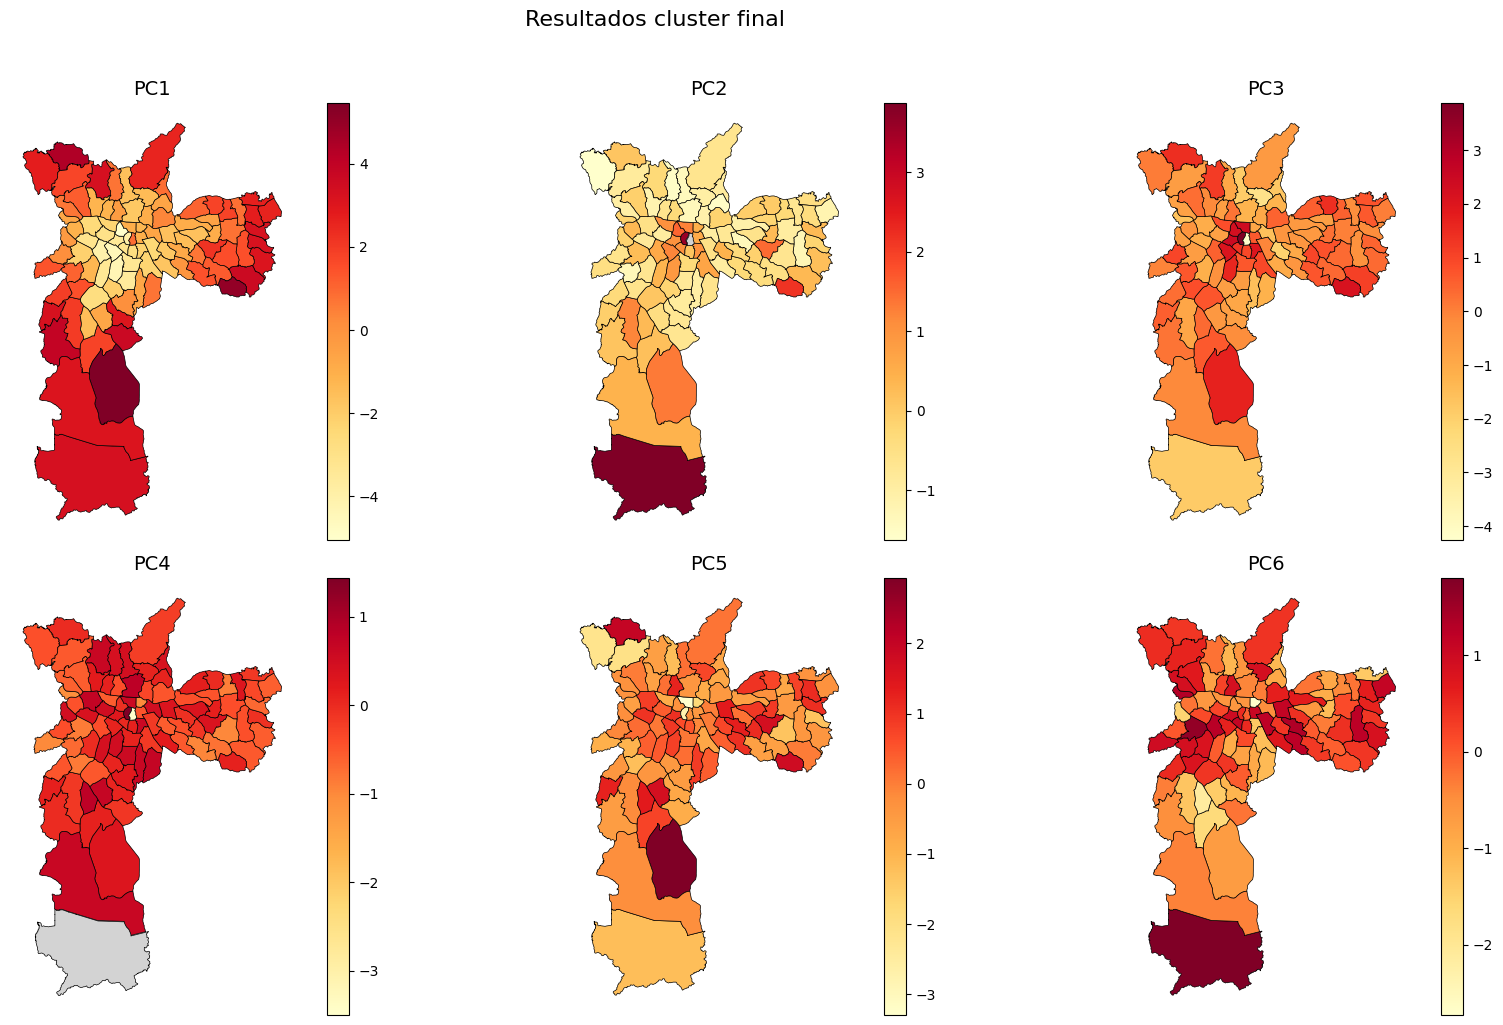

✅ Prancha gerada com sucesso e salva em:
G:\Meu Drive\CEBRAP\SEPEP\Resultados\prancha_Resultados cluster final.png


In [13]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

# Caminhos dos arquivos
caminho_shapefile = r'G:\Meu Drive\CEBRAP\SEPEP\distritos_sp\Distrito_SP.shp'
caminho_planilha = r'G:\Meu Drive\CEBRAP\SEPEP\Resultados\Resultados cluster final.xlsx'
aba_planilha = 'Componentes_Principais'

# Obter nome do arquivo Excel (sem extensão)
nome_arquivo = os.path.splitext(os.path.basename(caminho_planilha))[0]

# Carregar shapefile
gdf = gpd.read_file(caminho_shapefile)

# Carregar planilha e limpar nomes de colunas
df = pd.read_excel(caminho_planilha, sheet_name=aba_planilha)
df.columns = df.columns.str.strip()

# Confirmar nomes das colunas (opcional)
print("📌 Colunas no shapefile:", gdf.columns)
print("📌 Colunas na planilha:", df.columns)

# Definir colunas de junção
col_shapefile = 'NumeroDist'
col_planilha = 'ID_OD'

# Garantir tipos compatíveis
gdf[col_shapefile] = gdf[col_shapefile].astype(str)
df[col_planilha] = df[col_planilha].astype(str)

# ============================
# 🔧 EXCLUSÃO DE OUTLIERS (opcional)
# Para ativar a exclusão, descomente as linhas abaixo:
# Formato: (ID_OD, Nome_da_variável)
exclusoes = [
('80', 'PC2'),  # Exemplo: Exclui valor de PC1 do distrito 15
('52', 'PC4')   # Exemplo: Exclui valor de PC4 do distrito 23
]

# Aplicar exclusões, se existirem
for id_excluir, var_excluir in exclusoes:
    df.loc[(df['ID_OD'] == id_excluir), var_excluir] = pd.NA
# ============================

# Selecionar componentes principais
componentes = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
df_componentes = df[[col_planilha] + componentes]

# Merge
gdf_merged = gdf.merge(df_componentes, left_on=col_shapefile, right_on=col_planilha)

# Criar figura com subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Título principal da figura
plt.suptitle(f'{nome_arquivo}', fontsize=16, y=1.02)

# Plotar cada componente
for i, var in enumerate(componentes):
    gdf_merged.plot(
        column=var,
        cmap='YlOrRd',
        linewidth=0.5,
        edgecolor='black',
        legend=True,
        ax=axes[i],
        missing_kwds={
            "color": "lightgrey",
            "label": "Valor removido"
        }
    )
    axes[i].set_title(f'{var}', fontsize=14)
    axes[i].axis('off')

# Ajustar layout
plt.tight_layout()

# Exportar prancha
saida = rf'G:\Meu Drive\CEBRAP\SEPEP\Resultados\prancha_{nome_arquivo}.png'
plt.savefig(saida, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Prancha gerada com sucesso e salva em:\n{saida}")

c:\Users\anjos\AppData\Local\Programs\Python\Python313\Lib\site-packages\geopandas\plotting.py:946: UserWarning: Mismatched number of handles and labels: len(handles) = 3 len(labels) = 4
  ax.legend(**legend_kwds)


✔ Mapa salvo em: G:\Meu Drive\CEBRAP\SEPEP\Resultados\Mapa_Clusters_Final_SP.png


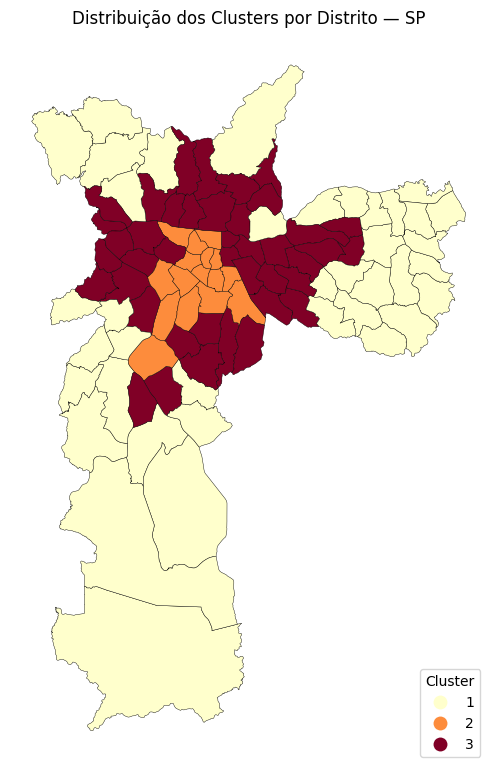

In [11]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# ── PARÂMETROS ───────────────────────────────────────────────────────────────
input_path     = r"G:\Meu Drive\CEBRAP\SEPEP\Resultados\Resultados cluster final.xlsx"
sheet_name     = "Dados_Completos"
shapefile_path = r"G:\Meu Drive\CEBRAP\SEPEP\distritos_sp\Distrito_SP.shp"
output_map     = r"G:\Meu Drive\CEBRAP\SEPEP\Resultados\Mapa_Clusters_Final_SP.png"

col_shapefile  = "NumeroDist"   # campo no shapefile
col_planilha   = "ID_OD"        # campo na planilha de clusters
col_cluster    = "Cluster"      # coluna existente com labels 0…3
# ────────────────────────────────────────────────────────────────────────────────

# 1. CARREGA PLANILHA COM CLUSTERS
df = pd.read_excel(
    input_path,
    sheet_name=sheet_name,
    dtype={col_planilha: int}
)

# 2. CARREGA SHAPEFILE
gdf = gpd.read_file(shapefile_path)

# garante que os campos de junção têm o mesmo tipo
gdf[col_shapefile] = gdf[col_shapefile].astype(int)

# 3. PREPARA E REALIZA O MERGE
df_join = df[[col_planilha, col_cluster]].copy()
gdfm = gdf.merge(
    df_join,
    left_on=col_shapefile,
    right_on=col_planilha,
    how="left"
)

# 4. PLOTA COM LEGENDA RENOMEADA (1–4, no canto inferior direito)
fig, ax = plt.subplots(figsize=(10, 8))

legend_labels = [str(i + 1) for i in range(4)]  # ['1','2','3','4']

gdfm.plot(
    column=col_cluster,
    categorical=True,
    cmap="YlOrRd",
    legend=True,
    legend_kwds={
        "labels":  legend_labels,
        "title":   "Cluster",
        "loc":     "lower right",
        "frameon": True
    },
    edgecolor="black",
    linewidth=0.3,
    ax=ax
)

ax.set_title("Distribuição dos Clusters por Distrito — SP")
ax.axis("off")
plt.tight_layout()

# 5. SALVA MAPA
os.makedirs(os.path.dirname(output_map), exist_ok=True)
fig.savefig(output_map, dpi=300)
print(f"✔ Mapa salvo em: {output_map}")